In [0]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 2.4MB/s 


In [0]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", 109)
pd.set_option("display.max_rows", None)

In [0]:
# Downloaded file locally from https://data.world/rvino88/1976-to-2015-nba-draft-data
df = pd.read_csv('1976_to_2015_Draftees_edit2 .csv')
df.head()

,Unnamed: 0,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,PTS,TRB,AST,FG_Percentage,TP_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year
0,1,Robert Parish,2,9,1976,8,GSW,Centenary College of Louisiana,21,1611,45704,23334,14715,2180,0.537,0.0,0.721,28.4,14.5,9.1,1.4,147.0,0.154,1.6,41.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0
1,2,Sonny Parker,0,0,1976,17,GSW,Texas A&M University,6,452,10916,4471,1841,954,0.501,0.0,0.755,24.2,9.9,4.1,2.1,26.9,0.118,2.2,11.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0
2,3,Marshall Rogers,0,0,1976,34,GSW,University of Texas-Pan American,1,26,176,100,11,10,0.371,0.0,0.933,6.8,3.8,0.4,0.4,-0.2,-0.043,-9.9,-0.4,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0
3,4,Jeff Fosnes,0,0,1976,68,GSW,Vanderbilt University,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0
4,5,Carl Bird,0,0,1976,86,GSW,University of California,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0


In [0]:
df.shape

(3961, 35)

In [0]:
df.dtypes

Unnamed: 0            int64
Player               object
All_NBA               int64
All.Star              int64
Draft_Yr              int64
Pk                    int64
Team                 object
College              object
Yrs                   int64
Games                 int64
Minutes.Played        int64
PTS                   int64
TRB                   int64
AST                   int64
FG_Percentage       float64
TP_Percentage       float64
FT_Percentage       float64
Minutes.per.Game    float64
Points.per.Game     float64
TRB.per.game        float64
Assits.per.Game     float64
Win.Share           float64
WS_per_game         float64
BPM                 float64
VORP                float64
Executive            object
Tenure               object
Exec_ID               int64
Exec_draft_exp        int64
attend_college        int64
first_year            int64
second_year           int64
third_year            int64
fourth_year           int64
fifth_year            int64
dtype: object

## Baseline Linear Regression Model

In [0]:
# Factorize categorical columns
df['player_factorized'] = pd.Series(pd.factorize(df['Player'])[0])
df['team_factorized'] = pd.Series(pd.factorize(df['Team'])[0])
df['college_factorized'] = pd.Series(pd.factorize(df['College'])[0])

In [0]:
# Separate into x and y variables
X_nums = df.drop(columns=['Player', 'Team', 'College', 'Executive', 'Tenure', 'Yrs'])
y = df['Yrs']

In [0]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_nums, y, test_size=0.33, random_state=42, shuffle=True)

In [0]:
pipeline = make_pipeline( 
#     StandardScaler(), 
    LinearRegression()
)

In [0]:
# Fit model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [0]:
# Train dataset predictions
y_pred = pipeline.predict(X_train)
rmse = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

Root Mean Square Error: 0.6521678231077043
R-squared: 0.9762094200034078


In [0]:
# Test dataset predictions
y_pred = pipeline.predict(X_test)
rmse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

Root Mean Square Error: 0.6664289991858862
R-squared: 0.974114949919729


In [0]:
# Really good scores, but there is data leakage from some features

## Correct For Data Leakage

In [0]:
df.head()

,Unnamed: 0,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,PTS,TRB,AST,FG_Percentage,TP_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year,player_factorized,team_factorized,college_factorized
0,1,Robert Parish,2,9,1976,8,GSW,Centenary College of Louisiana,21,1611,45704,23334,14715,2180,0.537,0.0,0.721,28.4,14.5,9.1,1.4,147.0,0.154,1.6,41.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,0,0
1,2,Sonny Parker,0,0,1976,17,GSW,Texas A&M University,6,452,10916,4471,1841,954,0.501,0.0,0.755,24.2,9.9,4.1,2.1,26.9,0.118,2.2,11.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,1,0,1
2,3,Marshall Rogers,0,0,1976,34,GSW,University of Texas-Pan American,1,26,176,100,11,10,0.371,0.0,0.933,6.8,3.8,0.4,0.4,-0.2,-0.043,-9.9,-0.4,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,2,0,2
3,4,Jeff Fosnes,0,0,1976,68,GSW,Vanderbilt University,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,3,0,3
4,5,Carl Bird,0,0,1976,86,GSW,University of California,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,4,0,4


In [0]:
# Feature engineer games per season and minutes per season
df['games_per_season'] = (df['Games'] / df['Yrs']).fillna(0)
df['minutes_per_season'] = (df['Minutes.Played'] / df['Yrs']).fillna(0)

In [0]:
# Drop unecessary and 'leaky' columns
df = df.drop(columns=['Games', 'Minutes.Played', 'PTS', 'TRB', 'AST', 
                      'TP_Percentage', 'Executive', 'Tenure', 'Exec_ID', 'Exec_draft_exp', 
                      'first_year', 'second_year', 'third_year', 'fourth_year', 'fifth_year',
                      'Unnamed: 0'])

In [0]:
#df['player_factorized'] = pd.Series(pd.factorize(df['Player'])[0])

In [0]:
df = df.drop(columns='Player')

In [0]:
# Take subset of data with players who have played 3 or more years
df = df[df['Yrs'] >= 3]

In [0]:
# train test split with subset
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Yrs'), df['Yrs'], test_size=0.33, random_state=42, shuffle=True)

In [0]:
# Make pipeline
pipeline2 = make_pipeline( 
    ce.OneHotEncoder(use_cat_names=True), 
    LinearRegression()
)

In [0]:
# fit pipeline/model
pipeline2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['Team', 'College'], drop_invariant=False,
       handle_unknown='impute', impute_missing=True, return_df=True,
       use_cat_names=True, verbose=0)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [0]:
# Train dataset predictions
y_pred_train = pipeline2.predict(X_train)
rmse = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

Root Mean Square Error: 1.142552145960497
R-squared: 0.8383455404698934


In [0]:
# Test dataset predictions
y_pred = pipeline2.predict(X_test)
rmse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

Root Mean Square Error: 1.287541712845975
R-squared: 0.724527932380837


In [0]:
# Lower scores, but that is to be expected

In [0]:
len(y_pred_train), len(y_train)

(971, 971)

In [0]:
# Comparing actual years and predictions side-by-side
X_train['Preds'] = y_pred_train
X_train['Yrs'] = y_train
X_train.head(20)

,All_NBA,All.Star,Draft_Yr,Pk,Team,College,FG_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,attend_college,games_per_season,minutes_per_season,Preds,Yrs
2646,0,0,1992,12,MIA,University of Southern California,0.460,0.785,18.7,9.0,2.2,1.2,4.2,0.053,-4.1,-2.0,1,50.000000,937.000000,5.204483,4
862,0,0,1998,55,DEN,University of Iowa,0.456,0.693,12.8,2.6,2.1,0.5,12.4,0.092,0.0,3.3,1,50.700000,650.200000,8.536665,10
1251,0,0,2008,6,NYK,0,0.415,0.855,30.7,14.9,4.6,1.9,34.2,0.135,1.1,9.6,0,56.714286,1741.142857,8.970167,7
1760,0,0,1981,12,DET,University of Notre Dame,0.473,0.849,29.6,17.2,3.8,3.0,44.4,0.102,0.1,11.3,1,70.700000,2095.900000,9.594961,10
3453,0,0,1980,4,CHI,Ohio State University,0.454,0.782,24.4,11.4,1.9,5.2,17.9,0.074,-2.4,-1.3,1,79.000000,1931.000000,7.301153,6
2548,0,0,1997,2,PHI,University of Utah,0.443,0.835,31.6,16.0,6.8,1.6,41.7,0.110,-0.2,8.4,1,63.888889,2016.666667,9.994699,9
3521,0,0,2012,15,PHI,St. John's University,0.459,0.589,21.7,6.7,3.5,0.8,8.4,0.067,-0.8,1.9,1,69.750000,1513.750000,8.274761,4
1822,0,0,1992,3,MIN,Duke University,0.480,0.820,29.7,12.8,6.7,2.6,64.9,0.121,1.6,23.2,1,66.769231,1981.538462,12.981174,13
3057,0,0,1991,9,ATL,"University of Nevada, Las Vegas",0.469,0.728,21.6,8.0,3.2,1.6,43.8,0.097,-0.2,9.8,1,66.733333,1443.866667,12.184160,15
2915,0,0,1976,99,PHI,University of South Carolina,0.467,0.810,19.2,8.0,1.6,3.9,16.1,0.092,-1.9,0.2,1,39.818182,766.181818,10.800648,11


## Random Forest Regression Model

In [0]:
df = pd.read_csv('1976_to_2015_Draftees_edit2 .csv')

In [0]:
df.head(2)

,Unnamed: 0,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,PTS,TRB,AST,FG_Percentage,TP_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year
0,1,Robert Parish,2,9,1976,8,GSW,Centenary College of Louisiana,21,1611,45704,23334,14715,2180,0.537,0.0,0.721,28.4,14.5,9.1,1.4,147.0,0.154,1.6,41.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0
1,2,Sonny Parker,0,0,1976,17,GSW,Texas A&M University,6,452,10916,4471,1841,954,0.501,0.0,0.755,24.2,9.9,4.1,2.1,26.9,0.118,2.2,11.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0


In [0]:
# Function for wrangling and splitting data

def wrangle_split(X):
  X = X.copy()
  
  # Factorize Player column
  X['player_factorized'] = pd.Series(pd.factorize(X['Player'])[0])
  
  # Feature engineer games per season and minutes per season
  X['games_per_season'] = (X['Games'] / X['Yrs']).fillna(0)
  X['minutes_per_season'] = (X['Minutes.Played'] / X['Yrs']).fillna(0)
  
  # Drop unecessary columns
  X = X.drop(columns=['Games', 'Minutes.Played', 'PTS', 'TRB', 'AST', 'Team', 'College', 'WS_per_game',
                       'TP_Percentage', 'Executive', 'Tenure', 'Exec_ID', 'Exec_draft_exp', 
                       'first_year', 'second_year', 'third_year', 'fourth_year', 'fifth_year',
                       'Unnamed: 0', 'Player', 'player_factorized'])
  
  # Filter by years in the league >= 3
  X = X[X['Yrs'] >= 3]
  
  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='Yrs'), 
                                                      X['Yrs'], test_size=0.33, 
                                                      random_state=42, shuffle=True)
  
  return X_train, X_test, y_train, y_test

In [0]:
%%time
# Use above function
X_train, X_test, y_train, y_test = wrangle_split(df)

CPU times: user 16.4 ms, sys: 3.23 ms, total: 19.6 ms
Wall time: 21.3 ms


In [0]:
len(X_train.columns)

16

In [0]:
%%time
# Make pipeline
pipeline3 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestRegressor()
)

# Make parameter grid
param_grid = {
    'randomforestregressor__n_estimators': [10, 50, 100, 1000],
    'randomforestregressor__max_depth': range(3, 6)
}

# Grid search to find best parameters
gridsearch = GridSearchCV(pipeline3, param_grid=param_grid, cv=5,
                          scoring='neg_mean_absolute_error', verbose=10, 
                          return_train_score=True)

# Fit gridsearch with data
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10, score=-1.4035946711718321, total=   0.0s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10, score=-1.5759057374694114, total=   0.0s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10, score=-1.4920410044082513, total=   0.0s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10, score=-1.5085096983449635, total=   0.0s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=10 
[CV]  randomforestregressor__max_depth=3, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50, score=-1.4110400993670218, total=   0.1s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50, score=-1.5119866536064808, total=   0.1s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s


[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50, score=-1.4786884297744287, total=   0.1s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50, score=-1.4830161914770401, total=   0.1s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s


[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=50, score=-1.3917279528210822, total=   0.1s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100, score=-1.400873058210877, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100, score=-1.519339464691594, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100, score=-1.4530926208435897, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100 
[CV]  randomforestregressor__max_depth=3, randomforestregressor__n_estimators=100, score=-1.4755331838394503, total=   0.2s
[CV] randomforestregressor__max_depth=3, randomforestre

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   44.9s finished


CPU times: user 48.2 s, sys: 60.6 ms, total: 48.2 s
Wall time: 48.2 s


In [0]:
# See best parameters
best_params = gridsearch.best_params_
best_params

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__n_estimators': 1000}

In [0]:
%%time

# Make pipeline with best params
pipeline4 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(n_estimators=1000, max_depth=5)
)

# fit new pipeline
pipeline4.fit(X_train, y_train)

CPU times: user 3.33 s, sys: 2.75 ms, total: 3.34 s
Wall time: 3.34 s


In [0]:
# Train dataset predictions
y_pred_train = pipeline4.predict(X_train)
rmse = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

Root Mean Square Error: 1.0184168796406474
R-squared: 0.8931052263987983


In [0]:
# Test dataset predictions
y_pred = pipeline4.predict(X_test)
rmse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

Root Mean Square Error: 1.082567282860121
R-squared: 0.8491702044454171


In [0]:
X_train.columns

Index(['All_NBA', 'All.Star', 'Draft_Yr', 'Pk', 'FG_Percentage',
       'FT_Percentage', 'Minutes.per.Game', 'Points.per.Game', 'TRB.per.game',
       'Assits.per.Game', 'Win.Share', 'BPM', 'VORP', 'attend_college',
       'games_per_season', 'minutes_per_season'],
      dtype='object')

In [0]:
# Function that predicts a new players longevity
def predict_new_player(All_NBA, All_Star, Draft_Yr, Draft_Pk,
                       FG_Percentage, FT_Percentage, Minutes_per_Game, 
                       Points_per_Game, TRB_per_game, Assits_per_Game, Win_Share, 
                       BPM, VORP, attend_college, 
                       games_per_season, minutes_per_season):
  
  d = {'All_NBA':All_NBA, 'All.Star':All_Star, 'Draft_Yr':Draft_Yr, 'Pk':Draft_Pk, 
       'FG_Percentage':FG_Percentage, 
       'FT_Percentage':FT_Percentage, 'Minutes.per.Game':Minutes_per_Game, 
       'Points.per.Game': Points_per_Game,'TRB.per.game':TRB_per_game, 
       'Assits.per.Game': Assits_per_Game, 'Win.Share':Win_Share, 
       'BPM':BPM, 'VORP':VORP, 
       'attend_college':attend_college,
       'games_per_season':games_per_season, 'minutes_per_season':minutes_per_season}
  
  X = pd.DataFrame(data=d, index=[0])
  y_pred = pipeline4.predict(X)
  
  return y_pred

In [0]:
# Kobe Bryant prediction
print(int(round(predict_new_player(15, 18, 1996, 13, 44.7, 83.7, 36, 25, 5.2, 4.7, 
                                   172.7, 3.88, 9, 0, 65, 2340)[0])))

17 Seasons


## Retrain Model With Test Dataset = Current Players

In [0]:
# Adding current players
df = pd.read_csv('1976_to_2015_Draftees_edit2 .csv')
cp = pd.read_excel('Current_Player.xlsx')
cp.head()

,Current NBA Players,Team
0,"Baynes, Aron",BOS
1,"Brown, Jaylen",BOS
2,"Dozier, P. J.",BOS
3,"Gibson, Jonathan",BOS
4,"Hayward, Gordon",BOS


In [0]:
# Reformat column
cp['Current_Players'] = cp['Current NBA Players'].str.split(', ').str[::-1].str.join(' ')
#cp

In [0]:
# Function that assigns 1 to current players and 0 to retired players
def is_current_player(name):
  current = cp['Current_Players'].tolist()
  if name in current:
    return 1
  else:
    return 0

In [0]:
# Apply above function and checking results
df['Current_Player'] = df['Player'].apply(is_current_player)
df.head()

,Unnamed: 0,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,PTS,TRB,AST,FG_Percentage,TP_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year,Current_Player
0,1,Robert Parish,2,9,1976,8,GSW,Centenary College of Louisiana,21,1611,45704,23334,14715,2180,0.537,0.0,0.721,28.4,14.5,9.1,1.4,147.0,0.154,1.6,41.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0
1,2,Sonny Parker,0,0,1976,17,GSW,Texas A&M University,6,452,10916,4471,1841,954,0.501,0.0,0.755,24.2,9.9,4.1,2.1,26.9,0.118,2.2,11.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0
2,3,Marshall Rogers,0,0,1976,34,GSW,University of Texas-Pan American,1,26,176,100,11,10,0.371,0.0,0.933,6.8,3.8,0.4,0.4,-0.2,-0.043,-9.9,-0.4,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0
3,4,Jeff Fosnes,0,0,1976,68,GSW,Vanderbilt University,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0
4,5,Carl Bird,0,0,1976,86,GSW,University of California,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0


In [0]:
# Wrangling

def wrangle(X):
  X = X.copy()
  
  # Feature engineer games per season and minutes per season
  X['games_per_season'] = (X['Games'] / X['Yrs']).fillna(0)
  X['minutes_per_season'] = (X['Minutes.Played'] / X['Yrs']).fillna(0)
  
  # Drop unecessary columns
  X = X.drop(columns=['Games', 'Minutes.Played', 'PTS', 'TRB', 'AST', 'Team', 'College', 'WS_per_game',
                       'TP_Percentage', 'Executive', 'Tenure', 'Exec_ID', 'Exec_draft_exp', 
                       'first_year', 'second_year', 'third_year', 'fourth_year', 'fifth_year',
                       'Unnamed: 0', 'Player'])
  
  # Filter by years in the league >= 3
  X = X[X['Yrs'] >= 3]
  
  return X

In [0]:
df_wrang = wrangle(df)
df_wrang.head()

,All_NBA,All.Star,Draft_Yr,Pk,Yrs,FG_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,BPM,VORP,attend_college,Current_Player,games_per_season,minutes_per_season
0,2,9,1976,8,21,0.537,0.721,28.4,14.5,9.1,1.4,147.0,1.6,41.5,1,0,76.714286,2176.380952
1,0,0,1976,17,6,0.501,0.755,24.2,9.9,4.1,2.1,26.9,2.2,11.5,1,0,75.333333,1819.333333
11,0,0,1977,16,14,0.469,0.807,24.6,9.4,1.9,5.5,47.2,-1.0,5.8,1,0,67.571429,1662.214286
21,0,0,1978,5,12,0.474,0.824,29.2,17.3,4.3,2.5,51.1,-0.1,11.6,1,0,70.166667,2045.750000
22,0,0,1978,22,3,0.411,0.703,13.1,4.8,1.0,1.4,1.0,-4.6,-1.3,1,0,51.333333,675.000000


In [0]:
df_wrang['Current_Player'].value_counts(normalize=True)

0    0.892414
1    0.107586
Name: Current_Player, dtype: float64

In [0]:
# Split data into retired (train) and current (test)
X_train = df_wrang[df_wrang['Current_Player'] == 0].drop(columns='Yrs')
X_test = df_wrang[df_wrang['Current_Player'] == 1].drop(columns='Yrs')
y_train = df_wrang[df_wrang['Current_Player'] == 0]['Yrs']
y_test = df_wrang[df_wrang['Current_Player'] == 1]['Yrs']

In [0]:
# Make sure dimensions are correct
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1294, 17), (156, 17), (1294,), (156,))

In [0]:
%%time
pipeline5 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(n_estimators=1000, max_depth=5)
)
pipeline5.fit(X_train, y_train)

CPU times: user 4.13 s, sys: 3.71 ms, total: 4.13 s
Wall time: 4.13 s


In [0]:
# Train dataset predictions
y_pred = pipeline5.predict(X_train)
rmse = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

Root Mean Square Error: 1.0392506872277245
R-squared: 0.8916081103805955


In [0]:
# Test dataset predictions
y_pred_test = pipeline5.predict(X_test)
rmse = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print('Mean Absolute Error:', rmse)
print('R-squared:', r2)

# R^2 and accuracy got "worse" on the test dataset. This is to be expected.
# Because these players are still in the league, we want our model to predict a
# higher number than the actual number of years they've played so far.

Root Mean Square Error: 1.3215605001437472
R-squared: 0.5419926411581758


## Lots of Wrangling/Merging for Database File

In [0]:
# Separate into current and retired dataframes
df_ret = df[df['Current_Player'] == 0].drop(columns='Unnamed: 0')
df_curr = df[df['Current_Player'] == 1].drop(columns='Unnamed: 0')

df_ret.shape, df_curr.shape

((3746, 35), (215, 35))

In [0]:
# Add features to both dataframes

df_ret['gamesPerSeason'] = (df_ret['Games'] / df_ret['Yrs']).fillna(0).round().astype(int)
df_ret['minutesPerSeason'] = (df_ret['Minutes.Played'] / df_ret['Yrs']).fillna(0).round().astype(int)

df_curr['gamesPerSeason'] = (df_curr['Games'] / df_curr['Yrs']).fillna(0).round().astype(int)
df_curr['minutesPerSeason'] = (df_curr['Minutes.Played'] / df_curr['Yrs']).fillna(0).round().astype(int)

In [0]:
# Filter both dfs by players who have played 3 years or more
df_ret_3more = pd.DataFrame(df[(df['Current_Player'] == 0) & (df['Yrs'] >= 3)]['Player'], columns=['Player'])
df_curr_3more = pd.DataFrame(df[(df['Current_Player'] == 1) & (df['Yrs'] >= 3)]['Player'], columns=['Player'])

In [0]:
# Add predictions column for retired players
df_ret_3more['predictions'] = (y_pred).round().astype(int)
df_ret_3more.head()

,Player,predictions
0,Robert Parish,18
1,Sonny Parker,9
11,Rickey Green,13
21,Purvis Short,12
22,Raymond Townsend,4


In [0]:
# Add predictions for current players
df_curr_3more['predictions'] = (y_pred_test).round().astype(int)
df_curr_3more.head()

,Player,predictions
125,Chris Paul,18
141,Raymond Felton,14
262,Andre Iguodala,18
264,Thabo Sefolosha,12
265,Thaddeus Young,12


In [0]:
df_curr_3more.shape, df_ret_3more.shape

((156, 2), (1294, 2))

In [0]:
# Merge retired predictions with retired dataframe
df_merge_ret = pd.merge(df_ret, df_ret_3more, how='outer', on='Player').fillna(0)
df_merge_ret['predictions'] = df_merge_ret['predictions'].astype(int)
df_merge_ret.head()

,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,PTS,TRB,AST,FG_Percentage,TP_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year,Current_Player,gamesPerSeason,minutesPerSeason,predictions
0,Robert Parish,2,9,1976,8,GSW,Centenary College of Louisiana,21,1611,45704,23334,14715,2180,0.537,0.0,0.721,28.4,14.5,9.1,1.4,147.0,0.154,1.6,41.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,77,2176,18
1,Sonny Parker,0,0,1976,17,GSW,Texas A&M University,6,452,10916,4471,1841,954,0.501,0.0,0.755,24.2,9.9,4.1,2.1,26.9,0.118,2.2,11.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,75,1819,9
2,Marshall Rogers,0,0,1976,34,GSW,University of Texas-Pan American,1,26,176,100,11,10,0.371,0.0,0.933,6.8,3.8,0.4,0.4,-0.2,-0.043,-9.9,-0.4,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,26,176,0
3,Jeff Fosnes,0,0,1976,68,GSW,Vanderbilt University,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,0,0,0
4,Carl Bird,0,0,1976,86,GSW,University of California,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,0,0,0


In [0]:
df_merge_ret.shape

(3764, 38)

In [0]:
# Merge current predictions with current dataframe
df_merge_curr = pd.merge(df_curr, df_curr_3more, how='outer', on='Player').fillna(0)
df_merge_curr['predictions'] = df_merge_curr['predictions'].astype(int)
df_merge_curr.head(5)

,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,Minutes.Played,PTS,TRB,AST,FG_Percentage,TP_Percentage,FT_Percentage,Minutes.per.Game,Points.per.Game,TRB.per.game,Assits.per.Game,Win.Share,WS_per_game,BPM,VORP,Executive,Tenure,Exec_ID,Exec_draft_exp,attend_college,first_year,second_year,third_year,fourth_year,fifth_year,Current_Player,gamesPerSeason,minutesPerSeason,predictions
0,Chris Paul,8,9,2005,4,NOH,Wake Forest University,11,773,27725,14506,3380,7688,0.473,0.365,0.864,35.9,18.8,4.4,9.9,144.1,0.249,7.5,66.4,Allan Bristow,471 days 00:00:00.000000000,3,5,1,0,0,0,0,0,1,70,2520,18
1,Raymond Felton,0,0,2005,5,CHA,University of North Carolina,11,776,25385,9608,2459,4650,0.412,0.327,0.789,32.7,12.4,3.2,6.0,35.3,0.067,-0.4,10.0,Bernie Bickerstaff,1323 days 00:00:00.000000000,4,8,1,0,0,0,0,0,1,71,2308,14
2,Andre Iguodala,0,0,2004,9,PHI,University of Arizona,12,900,31836,12109,4829,4134,0.462,0.334,0.715,35.4,13.5,5.4,4.6,82.0,0.124,3.0,40.5,Billy King,3486 days 00:00:00.000000000,10,7,1,0,0,0,0,0,1,75,2653,18
3,Thabo Sefolosha,0,0,2006,13,PHI,0,10,678,15615,3956,2605,1004,0.447,0.345,0.732,23.0,5.8,3.8,1.5,31.3,0.096,1.1,12.0,Billy King,3486 days 00:00:00.000000000,10,9,0,0,0,0,0,0,1,68,1562,12
4,Thaddeus Young,0,0,2007,12,PHI,Georgia Institute of Technology,9,665,20357,9251,3916,1012,0.497,0.319,0.688,30.6,13.9,5.9,1.5,42.6,0.101,0.3,11.7,Billy King,3486 days 00:00:00.000000000,10,10,1,0,0,0,0,0,1,74,2262,12


In [0]:
df_merge_curr.shape[0] + df_merge_ret.shape[0]

3979

In [0]:
# Concatenate current and retired dataframes
df_true = pd.concat([df_merge_ret, df_merge_curr])
df_true.shape

(3979, 38)

In [0]:
# Load dataset with players' physical stats
df_rick = pd.read_csv('https://raw.githubusercontent.com/nba-career/Data/master/player_data.csv')
df_rick.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [0]:
df_rick.shape

(4550, 8)

In [0]:
# Rename column and drop extra columns
df_rick['Player'] = df_rick['name']
df_rick = df_rick.drop(columns=['name', 'college'])
df_rick.head()

,year_start,year_end,position,height,weight,birth_date,Player
0,1991,1995,F-C,6-10,240.0,"June 24, 1968",Alaa Abdelnaby
1,1969,1978,C-F,6-9,235.0,"April 7, 1946",Zaid Abdul-Aziz
2,1970,1989,C,7-2,225.0,"April 16, 1947",Kareem Abdul-Jabbar
3,1991,2001,G,6-1,162.0,"March 9, 1969",Mahmoud Abdul-Rauf
4,1998,2003,F,6-6,223.0,"November 3, 1974",Tariq Abdul-Wahad


In [0]:
# Merge above physical data with other stats/predictions data
df_true_true = pd.merge(df_true, df_rick, on='Player', how='left')
df_true_true.shape

(4061, 44)

In [0]:
# Rename columns for database
df_true_true = df_true_true.rename(index=str, columns={'Player': 'player', 'All_NBA': 'allNba', 
                                        'All.Star': 'allStar', 'Draft_Yr': 'draftYear',
                                        'Pk': 'pick', 'Team': 'team', 'College': 'college',
                                        'Yrs': 'years', 'Games': 'game', 'Minutes.Played': 'minutesPlayed',
                                        'PTS': 'points', 'TRB': 'trb', 'AST': 'totalAssists',
                                        'FG_Percentage': 'fgPercent', 'TP_Percentage': 'tpPercent',
                                        'FT_Percentage': 'ftPercent', 'Minutes.per.Game': 'minutesPerGame',
                                        'Points.per.Game': 'pointPerGame', 'TRB.per.game': 'trbPerGame',
                                        'Assits.per.Game': 'assistsPerGame', 'Win.Share': 'winShare',
                                        'WS_per_game': 'wsPerGame', 'BPM': 'bpm', 'VORP': 'vorp',
                                        'Executive': 'executive', 'Tenure': 'tenure', 'Exec_ID': 'executiveId',
                                        'Exec_draft_exp': 'execDraftExp', 'attend_college': 'attendCollege',
                                        'first_year': 'firstYear', 'second_year': 'secondYear', 'third_year': 'thirdYear',
                                        'fourth_year': 'fourthYear', 'fifth_year': 'fifthYear',
                                        'Current_Player': 'currentPlayer', 'year_start': 'yearStart',
                                        'year_end': 'yearEnd', 'birth_date': 'birthDate'})
df_true_true.head(0)

,player,allNba,allStar,draftYear,pick,team,college,years,game,minutesPlayed,points,trb,totalAssists,fgPercent,tpPercent,ftPercent,minutesPerGame,pointPerGame,trbPerGame,assistsPerGame,winShare,wsPerGame,bpm,vorp,executive,tenure,executiveId,execDraftExp,attendCollege,firstYear,secondYear,thirdYear,fourthYear,fifthYear,currentPlayer,gamesPerSeason,minutesPerSeason,predictions,yearStart,yearEnd,position,height,weight,birthDate


In [0]:
# Inspect data
#df_true_true.head(3000)

In [0]:
# Inspect predictions
#df_true_true[df_true_true['years'] >= 3][['player', 'years', 'predictions']].head(100)

In [0]:
# Save data to csv to import into PostSQL database
#df_true_true.to_csv('NbaStats.csv')

In [0]:
# Updating current player teams

In [0]:
cp = cp.drop(columns='Current NBA Players')
cp.head()

,Team,Current_Players
0,BOS,Aron Baynes
1,BOS,Jaylen Brown
2,BOS,P. J. Dozier
3,BOS,Jonathan Gibson
4,BOS,Gordon Hayward


In [0]:
cp[cp['Current_Players'] == 'Kevin Durant']

,Team,Current_Players
423,GSW,Kevin Durant


In [0]:
# Load previous database file
nba = pd.read_csv('NbaStats.csv')
nba.head()

,Unnamed: 0,player,allNba,allStar,draftYear,pick,team,college,years,game,minutesPlayed,points,trb,totalAssists,fgPercent,tpPercent,ftPercent,minutesPerGame,pointPerGame,trbPerGame,assistsPerGame,winShare,wsPerGame,bpm,vorp,executive,tenure,executiveId,execDraftExp,attendCollege,firstYear,secondYear,thirdYear,fourthYear,fifthYear,currentPlayer,gamesPerSeason,minutesPerSeason,predictions,yearStart,yearEnd,position,height,weight,birthDate
0,0,Robert Parish,2,9,1976,8,GSW,Centenary College of Louisiana,21,1611,45704,23334,14715,2180,0.537,0.0,0.721,28.4,14.5,9.1,1.4,147.0,0.154,1.6,41.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,77,2176,17,1977.0,1997.0,C,7-0,230.0,"August 30, 1953"
1,1,Sonny Parker,0,0,1976,17,GSW,Texas A&M University,6,452,10916,4471,1841,954,0.501,0.0,0.755,24.2,9.9,4.1,2.1,26.9,0.118,2.2,11.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,75,1819,9,1977.0,1982.0,F-G,6-6,200.0,"March 22, 1955"
2,2,Marshall Rogers,0,0,1976,34,GSW,University of Texas-Pan American,1,26,176,100,11,10,0.371,0.0,0.933,6.8,3.8,0.4,0.4,-0.2,-0.043,-9.9,-0.4,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,26,176,0,1977.0,1977.0,G,6-1,190.0,"August 27, 1953"
3,3,Jeff Fosnes,0,0,1976,68,GSW,Vanderbilt University,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Carl Bird,0,0,1976,86,GSW,University of California,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
cp[cp['Current_Players'] == 'Kevin Durant']['Team'].tolist()[0]

'GSW'

In [0]:
nba[nba['player'] == 'Kevin Durant']['team'].tolist()[0]

'OKC'

In [0]:
# For loop that updates team if team not current
teams = []
for name in nba['player']:
  if name in cp['Current_Players'].tolist():
    teams.append(cp[cp['Current_Players'] == name]['Team'].tolist()[0])
  else:
    teams.append(nba[nba['player'] == name]['team'].tolist()[0])
    
# teams list and nba dataset rows are same length
len(teams) == nba.shape[0]

True

In [0]:
# See list
#teams

In [0]:
# Check if current players assigned correct team
nba['team3'] = teams
nba[nba['player'] == 'Kawhi Leonard']

,Unnamed: 0,player,allNba,allStar,draftYear,pick,team,college,years,game,minutesPlayed,points,trb,totalAssists,fgPercent,tpPercent,ftPercent,minutesPerGame,pointPerGame,trbPerGame,assistsPerGame,winShare,wsPerGame,bpm,vorp,executive,tenure,executiveId,execDraftExp,attendCollege,firstYear,secondYear,thirdYear,fourthYear,fifthYear,currentPlayer,gamesPerSeason,minutesPerSeason,predictions,yearStart,yearEnd,position,height,weight,birthDate,team1,team2,team3
3991,3991,Kawhi Leonard,1,1,2011,15,IND,San Diego State University,5,324,9680,4620,2039,643,0.499,0.391,0.828,29.9,14.3,6.3,2.0,41.8,0.207,5.9,19.2,Larry Bird,3274 days 00:00:00.000000000,100,7,1,0,0,0,0,1,1,65,1936,11,2012.0,2018.0,F,6-7,230.0,"June 29, 1991",None,GSW,TOR


In [0]:
# drop test columns
nba = nba.drop(columns=['team1', 'team2', 'team3'])

In [0]:
# replace old teams column with new teams column
nba['team'] = teams
nba.head()

,Unnamed: 0,player,allNba,allStar,draftYear,pick,team,college,years,game,minutesPlayed,points,trb,totalAssists,fgPercent,tpPercent,ftPercent,minutesPerGame,pointPerGame,trbPerGame,assistsPerGame,winShare,wsPerGame,bpm,vorp,executive,tenure,executiveId,execDraftExp,attendCollege,firstYear,secondYear,thirdYear,fourthYear,fifthYear,currentPlayer,gamesPerSeason,minutesPerSeason,predictions,yearStart,yearEnd,position,height,weight,birthDate
0,0,Robert Parish,2,9,1976,8,GSW,Centenary College of Louisiana,21,1611,45704,23334,14715,2180,0.537,0.0,0.721,28.4,14.5,9.1,1.4,147.0,0.154,1.6,41.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,77,2176,17,1977.0,1997.0,C,7-0,230.0,"August 30, 1953"
1,1,Sonny Parker,0,0,1976,17,GSW,Texas A&M University,6,452,10916,4471,1841,954,0.501,0.0,0.755,24.2,9.9,4.1,2.1,26.9,0.118,2.2,11.5,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,75,1819,9,1977.0,1982.0,F-G,6-6,200.0,"March 22, 1955"
2,2,Marshall Rogers,0,0,1976,34,GSW,University of Texas-Pan American,1,26,176,100,11,10,0.371,0.0,0.933,6.8,3.8,0.4,0.4,-0.2,-0.043,-9.9,-0.4,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,26,176,0,1977.0,1977.0,G,6-1,190.0,"August 27, 1953"
3,3,Jeff Fosnes,0,0,1976,68,GSW,Vanderbilt University,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Carl Bird,0,0,1976,86,GSW,University of California,0,0,0,0,0,0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,Al Attles,3641 days 00:00:00.000000000,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# shape is correct
nba.shape

(4061, 45)

In [0]:
# no nulls
nba['team'].isnull().sum()

0

In [0]:
# save updated file to csv
#nba.to_csv('nbaStatsCurrent.csv')

## Research

In [0]:
nba[nba['years'] == 21][['player', 'years']]

# The players with the longest careers in our dataset -- tied at 21

,player,years
0,Robert Parish,21
2425,Kevin Garnett,21
3557,Kevin Willis,21


In [0]:
nba[nba['years'] >= 19][['player', 'years']]
# 12 players made it to 19 or more

,player,years
0,Robert Parish,21
219,James Edwards,19
390,Kobe Bryant,20
1477,John Stockton,19
1486,Karl Malone,19
1594,Tim Duncan,19
1683,Charles Oakley,19
2388,Juwan Howard,19
2425,Kevin Garnett,21
2821,Jason Kidd,19


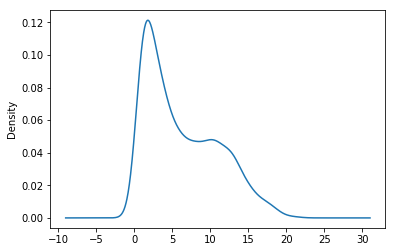

In [0]:
nba[nba['years'] > 0]['years'].plot.density();
# Observations of years played is heavily weighted to the low side
# Most players don't make it past their first few years

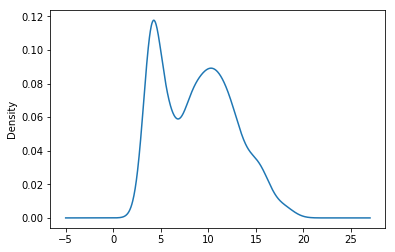

In [0]:
nba[nba['predictions'] > 0]['predictions'].plot.density();
# Our predictions reflect the above, but may overpredict
# players making it to ~10 years

In [0]:
nba[nba['years'] > 1].sort_values(by=['fgPercent'], ascending=False)[['player', 'fgPercent', 'years', 'height', 'position']].head(10)
# The players with the best field goal percentage are big guys who play around the rim

,player,fgPercent,years,height,position
455,Steve Lingenfelter,0.714,2,6-9,F
3921,DeAndre Jordan,0.670,8,6-11,C
2058,Maceo Baston,0.616,4,6-9,F
3943,Hassan Whiteside,0.609,4,7-0,C
3337,Brandan Wright,0.608,8,6-10,F-C
3716,Pete Williams,0.602,2,6-7,F
831,Andris Biedrins,0.594,10,6-11,C
3918,Tyson Chandler,0.591,15,7-1,C
147,Ryan Hollins,0.584,10,7-0,C
3976,Dwight Howard,0.582,12,6-11,C


In [0]:
nba['position'].value_counts()

G      762
F      659
C      275
F-C    187
G-F    163
F-G    108
C-F     93
Name: position, dtype: int64

In [0]:
nba[nba['years'] >= 3].groupby(['position'])['years'].mean().sort_values(ascending=False)

position
F-C    9.585526
F-G    9.314607
C-F    8.887324
G-F    8.368421
G      8.233266
C      8.026455
F      7.788265
Name: years, dtype: float64